<hr/>

# Loan defaulter classification system using Keras - Artificial Neural Network
<hr/>


<a id="ch1"></a>
# 1. Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.manifold import TSNE
import seaborn as sns
from time import time


<a id="ch2"></a>
# 2. Dataset


---
Link - https://www.kaggle.com/datasets/abhishek14398/loan-dataset


### Loading the data

In [8]:
loan_df = pd.read_csv("loan_train_sampled.csv")
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,loan_status
0,6000,6000,6000.00000,36 months,10.59,B,B2,10,MORTGAGE,130000.0,...,751.93,0.0,0.0,0.0,Jan-13,3441.52,May-13,0,0,Fully Paid
1,14000,14000,13991.39746,36 months,19.82,G,G1,4,RENT,40000.0,...,4686.01,0.0,0.0,0.0,Jan-13,554.99,Dec-15,0,0,Fully Paid
2,15000,15000,14700.00000,36 months,11.14,B,B1,7,RENT,36700.0,...,1979.51,0.0,0.0,0.0,Mar-11,8616.51,May-16,0,0,Fully Paid
3,8000,8000,7775.00000,36 months,7.14,A,A3,10,RENT,126252.0,...,384.99,0.0,0.0,0.0,Apr-11,6409.52,Mar-16,0,0,Fully Paid
4,20500,12625,12625.00000,60 months,20.89,F,F1,9,MORTGAGE,54000.0,...,7502.09,0.0,0.0,0.0,Mar-16,88.58,Mar-16,0,0,Fully Paid


### Preview of the dataset

In [9]:
loan_df.shape

(16780, 39)

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   16780 non-null  int64  
 1   funded_amnt                 16780 non-null  int64  
 2   funded_amnt_inv             16780 non-null  float64
 3   term                        16780 non-null  object 
 4   int_rate                    16780 non-null  float64
 5   grade                       16780 non-null  object 
 6   sub_grade                   16780 non-null  object 
 7   emp_length                  16780 non-null  int64  
 8   home_ownership              16780 non-null  object 
 9   annual_inc                  16780 non-null  float64
 10  verification_status         16780 non-null  object 
 11  issue_d                     16780 non-null  object 
 12  purpose                     16780 non-null  object 
 13  title                       167

In [11]:


loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,16780.0,11097.749106,7273.057226,1000.00,5400.000000,9800.000000,15000.000000,35000.000000
funded_amnt,16780.0,10838.647735,7016.709581,1000.00,5325.000000,9600.000000,15000.000000,35000.000000
funded_amnt_inv,16780.0,10362.358440,6925.787448,0.00,5000.000000,8950.000000,14374.713900,35000.000000
int_rate,16780.0,12.521789,3.647799,5.42,10.000000,12.530000,15.050000,24.400000
emp_length,16780.0,5.036234,3.286796,1.00,2.000000,4.000000,8.000000,10.000000
annual_inc,16780.0,60282.821036,27316.525010,4000.00,40000.000000,55000.000000,76000.000000,141996.000000
dti,16780.0,13.795358,6.387046,0.00,9.030000,14.010000,18.820000,29.930000
delinq_2yrs,16780.0,0.130989,0.458160,0.00,0.000000,0.000000,0.000000,9.000000
inq_last_6mths,16780.0,0.838915,1.023113,0.00,0.000000,1.000000,1.000000,8.000000
open_acc,16780.0,9.090465,4.212095,2.00,6.000000,8.000000,11.000000,39.000000


<a id="ch3"></a>
# 3. Data preprocessing

### Check if any value is **NAN** in dataframe

In [12]:
loan_df.isnull().values.any()

False

### Check for categorical columns in data

In [13]:
loan_df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d', 'loan_status'],
      dtype='object')

<a id="ch4"></a>
# 4. Categorical variables and dummy variables

##### Work around categorical columns to convert string/object data to integer values

In [14]:
print(loan_df['term'].value_counts())
loan_df['term'] = loan_df['term'].apply(lambda term: int(term[:3]))
print(loan_df['term'].value_counts())

 36 months    11769
 60 months     5011
Name: term, dtype: int64
36    11769
60     5011
Name: term, dtype: int64


##### Drop grade feature as it is a part of sub_grade feature

In [15]:
loan_df = loan_df.drop('grade', axis=1)

##### Using one hot encoding for other categorical features

In [16]:
subgrade_dummies = pd.get_dummies(loan_df['sub_grade'],drop_first=True)
loan_df = pd.concat([loan_df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [17]:


loan_df['home_ownership'] = loan_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(loan_df['home_ownership'],drop_first=True)
loan_df = loan_df.drop('home_ownership',axis=1)
loan_df = pd.concat([loan_df,dummies],axis=1)

In [18]:
loan_df.select_dtypes(['object']).columns

Index(['verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'loan_status'],
      dtype='object')

In [19]:
dummies = pd.get_dummies(loan_df[['verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' ]],drop_first=True)
loan_df = loan_df.drop(['verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],axis=1)
loan_df = pd.concat([loan_df,dummies],axis=1)

##### Comparing class imbalance in train dataset

In [20]:
loan_fully_paid = sum(loan_df["loan_status"] == "Fully Paid")/len(loan_df)
loan_charged_off = sum(loan_df["loan_status"] == "Charged Off")/len(loan_df)

In [21]:
loan_fully_paid

0.5988081048867699

In [22]:
loan_charged_off

0.40119189511323006

In [23]:
loan_fullypaid = loan_df[loan_df['loan_status'] == "Fully Paid"].copy()
loan_chargedoff = loan_df[loan_df['loan_status'] == "Charged Off"].copy()

## Loan amount vs loan status graph

<ipython-input-24-2346aa339c2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_fullypaid["loan_amnt"], label='Fully Paid')
<ipython-input-24-2346aa339c2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_chargedoff["loan_amnt"], label='Charged Off')


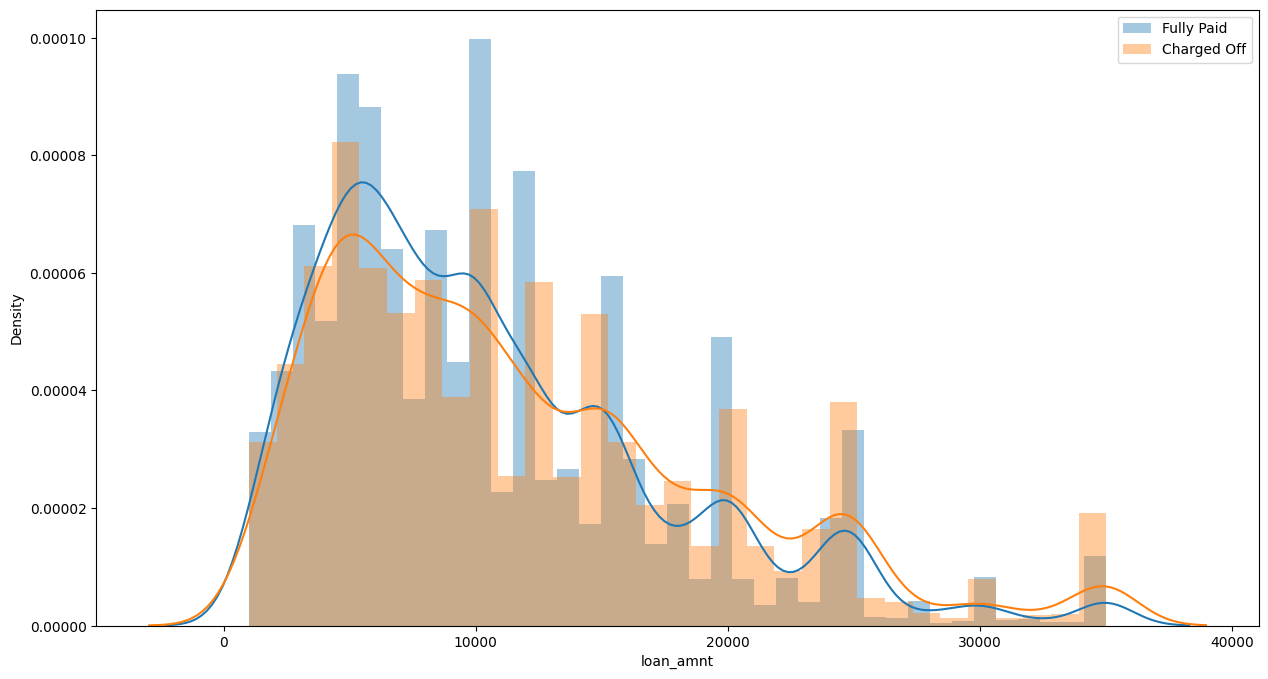

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(loan_fullypaid["loan_amnt"], label='Fully Paid')
sns.distplot(loan_chargedoff["loan_amnt"], label='Charged Off')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()


<a id="ch5"></a>
# 5. Train test split and data scaling

In [25]:
loan_df['loan_status'] = loan_df['loan_status'].replace(['Fully Paid'], 1)
loan_df['loan_status'] = loan_df['loan_status'].replace(['Charged Off'], 0)

# preparing data and class dataframes
Y = loan_df["loan_status"]
Y = np.asarray(Y).astype(np.float32)
X = loan_df.drop(columns=["loan_status"])


##### Data split

In [26]:
# Split with 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

##### Normalizing/Scaling the data

In [27]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


<a id="ch6"></a>
# 6. Model architecture

In [28]:
model = keras.Sequential()

# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
input_shape = X_train.shape
model.build(input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (13424, 78)               637572    
                                                                 
 dropout (Dropout)           (13424, 78)               0         
                                                                 
 dense_1 (Dense)             (13424, 39)               3081      
                                                                 
 dropout_1 (Dropout)         (13424, 39)               0         
                                                                 
 dense_2 (Dense)             (13424, 19)               760       
                                                                 
 dropout_2 (Dropout)         (13424, 19)               0         
                                                                 
 dense_3 (Dense)             (13424, 1)                2

<a id="ch7"></a>
# 7. Training

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [34]:
start = time()
history = model.fit(x=X_train,
          y=y_train,
          epochs=400,
          verbose = 2,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])
print(time()-start)

Epoch 1/400
53/53 - 4s - loss: 0.5985 - accuracy: 0.6441 - val_loss: 0.4642 - val_accuracy: 0.8272 - 4s/epoch - 69ms/step
Epoch 2/400
53/53 - 2s - loss: 0.3397 - accuracy: 0.8781 - val_loss: 0.2393 - val_accuracy: 0.9023 - 2s/epoch - 31ms/step
Epoch 3/400
53/53 - 2s - loss: 0.1641 - accuracy: 0.9431 - val_loss: 0.1692 - val_accuracy: 0.9321 - 2s/epoch - 31ms/step
Epoch 4/400
53/53 - 2s - loss: 0.0902 - accuracy: 0.9720 - val_loss: 0.1428 - val_accuracy: 0.9499 - 2s/epoch - 30ms/step
Epoch 5/400
53/53 - 2s - loss: 0.0564 - accuracy: 0.9814 - val_loss: 0.1341 - val_accuracy: 0.9467 - 2s/epoch - 30ms/step
Epoch 6/400
53/53 - 3s - loss: 0.0353 - accuracy: 0.9902 - val_loss: 0.1285 - val_accuracy: 0.9583 - 3s/epoch - 47ms/step
Epoch 7/400
53/53 - 2s - loss: 0.0276 - accuracy: 0.9924 - val_loss: 0.1294 - val_accuracy: 0.9538 - 2s/epoch - 28ms/step
Epoch 8/400
53/53 - 2s - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.1380 - val_accuracy: 0.9496 - 2s/epoch - 31ms/step
Epoch 9/400
53/53 - 1s -

<a id="ch8"></a>
# 8. Model evaluation

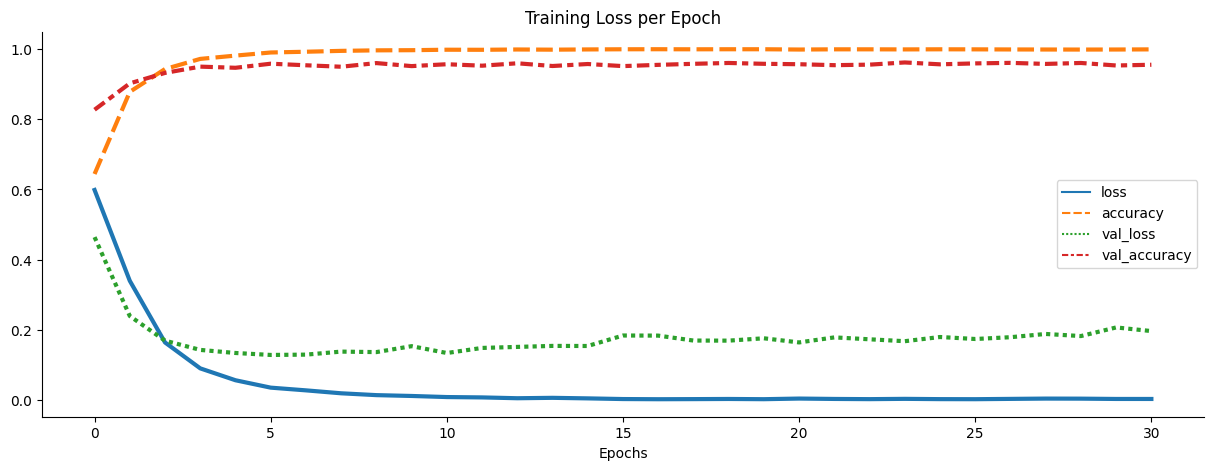

In [35]:
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

##### Training classification report and confusion matrix

In [26]:
predict_x_train=model.predict(X_train)
predict_x_train
predict_x_train[predict_x_train <= 0.5] = 0.
predict_x_train[predict_x_train > 0.5] = 1.

420/420 [==============================] - 2s 5ms/step


In [27]:
print('Training Classification Report:')
print(classification_report(y_train, predict_x_train))
print('\n')
print('Training Confusion Matirx:')
print(confusion_matrix(y_train, predict_x_train))

Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5391
         1.0       1.00      1.00      1.00      8033

    accuracy                           1.00     13424
   macro avg       1.00      1.00      1.00     13424
weighted avg       1.00      1.00      1.00     13424



Training Confusion Matirx:
[[5389    2]
 [   0 8033]]


##### Test classification report and confusion matrix

In [28]:
predict_x_test=model.predict(X_test)
predict_x_test[predict_x_test <= 0.5] = 0.
predict_x_test[predict_x_test > 0.5] = 1.

105/105 [==============================] - 1s 5ms/step


In [29]:
print('Classification Report:')
print(classification_report(y_test, predict_x_test))
print('\n')
print('Confusion Matirx:')
print(confusion_matrix(y_test, predict_x_test))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1341
         1.0       0.96      0.98      0.97      2015

    accuracy                           0.96      3356
   macro avg       0.96      0.96      0.96      3356
weighted avg       0.96      0.96      0.96      3356



Confusion Matirx:
[[1258   83]
 [  50 1965]]


##### T-sne data visualization

In [41]:
np.random.seed(0)
X = X_train
y = predict_x_train

# Apply T-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)



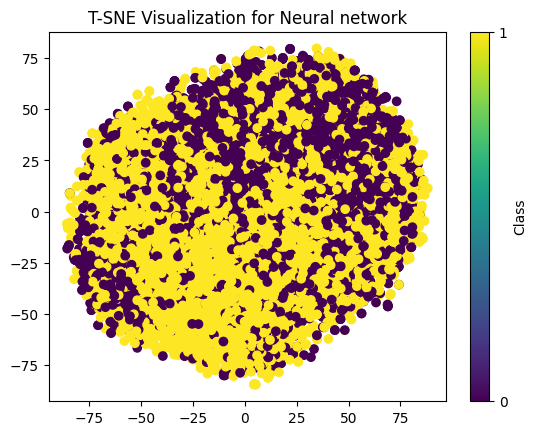

In [42]:
# Create a scatter plot of the data points
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('T-SNE Visualization for Neural network')
plt.colorbar(ticks=[0, 1], label='Class')
plt.show()

##### ROC curve

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, predict_x_test)
auc = roc_auc_score(y_test, predict_x_test)


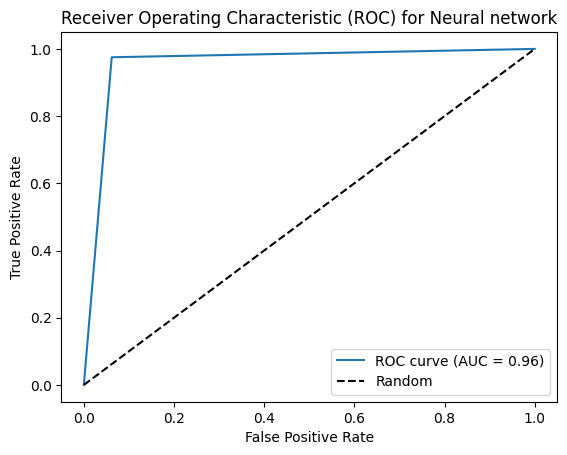

In [40]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Neural network')
plt.legend(loc='lower right')
plt.show()

##### Train vs test accuracy

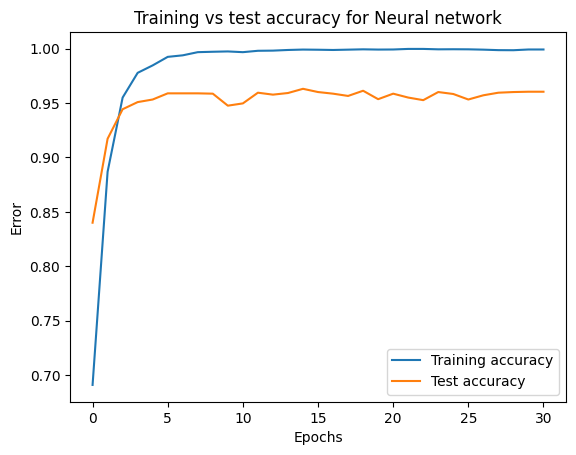

In [38]:
train_error = history.history['accuracy']
test_error = history.history['val_accuracy']

# Plot training and test error
plt.plot(train_error, label='Training accuracy')
plt.plot(test_error, label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training vs test accuracy for Neural network')
plt.legend()
plt.show()

##### Train vs test error

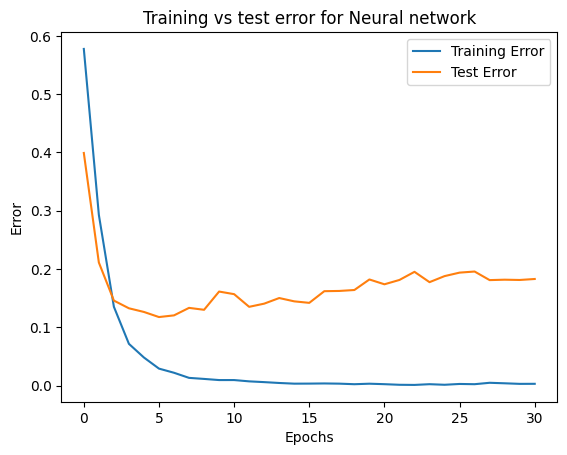

In [39]:
train_error = history.history['loss']
test_error = history.history['val_loss']

# Plot training and test error
plt.plot(train_error, label='Training Error')
plt.plot(test_error, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training vs test error for Neural network')
plt.legend()
plt.show()

##### Test loss and accuracy

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.1830122172832489
Test accuracy: 0.9603694677352905
